In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
pca = PCA(svd_solver='auto')

In [3]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4i/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [4]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.242375,2.156780,2.121928,3.793043,0.004627,0.226893,0.082562,0,0.459024,4.251276,...,2,5,0.250000,0.315587,0,,0,,0.500000,neutral
1,1.364151,1.543752,0.721928,3.899752,0.005008,0.069533,0.027793,0,0.183083,4.157277,...,1,5,0.250000,0.315462,0,,0,,0.250000,contradiction
2,1.354370,1.640224,1.370951,3.895909,0.004943,0.082896,0.034248,0,0.243614,4.438309,...,1,5,0.333333,0.335940,0,,0,,1.000000,entailment
3,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,4.292915,...,0,4,0.500000,0.000000,0,,0,,0.000000,neutral
4,1.365683,1.405639,1.000000,3.869048,0.004221,0.067400,0.046895,0,0.146527,4.324714,...,1,4,0.500000,0.207519,0,,0,,0.000000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,1.386024,1.770951,0.000000,3.810844,0.004796,0.039455,0.019878,0,0.687645,4.025135,...,1,5,0.250000,0.736966,0,,0,,0.333333,contradiction
449996,0.000000,1.822816,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,4.109940,...,0,5,0.333333,0.000000,0,,0,,0.500000,entailment
449997,0.000000,1.792481,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.000000,3.706709,...,0,3,1.000000,0.000000,0,,0,,0.000000,entailment
449998,1.300384,2.040224,1.224394,3.855192,0.005082,0.152291,0.095476,0,0.306967,3.994837,...,3,3,0.000000,0.460274,0,,0,,0.333333,neutral


In [5]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]
#train["meartsx"]=train["mearts"]*train["distancias"]

In [6]:
train = train[['negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]


In [7]:
#train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0,0,0.458233,0.386554,0,0,0,0.40,1.000000,0.459024,0.500000,0.250000,neutral
1,0,0,0.257524,0.234134,1,0,1,0.20,1.500000,0.183083,0.250000,0.250000,contradiction
2,0,0,0.542400,0.611403,0,0,0,0.20,0.918296,0.243614,1.000000,0.333333,entailment
3,0,0,4.292915,0.763564,0,1,1,0.00,1.584963,0.000000,0.000000,0.500000,neutral
4,0,0,0.455666,0.466300,0,0,0,0.25,1.000000,0.146527,0.000000,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,0,0,0.214292,0.405638,1,1,1,0.20,1.921928,0.687645,0.333333,0.250000,contradiction
449996,0,0,4.109940,0.563393,1,1,1,0.00,1.500000,0.000000,0.500000,0.333333,entailment
449997,0,0,3.706709,0.539128,2,0,0,0.00,0.000000,1.000000,0.000000,1.000000,entailment
449998,0,0,0.139645,0.288076,1,0,0,1.00,0.970951,0.306967,0.333333,0.000000,neutral


In [8]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [9]:
# RTE3
y_t=[]
for i in y_:
    if i == "entailment":
        y_t.append(1)
    elif i == "neutral":
        y_t.append(2)
    else:
        y_t.append(0)

In [43]:
# scaler = preprocessing.MaxAbsScaler().fit(X)
# X_scaled = scaler.transform(X)
# X = X_scaled

In [10]:
y_.unique()

array(['neutral', 'contradiction', 'entailment'], dtype=object)

In [11]:
Y_pca = pca.fit_transform(X)

In [12]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[7.23679093e-01 1.52848917e-01 7.50592811e-02 1.42559796e-02
 1.05052993e-02 7.36580793e-03 5.56114811e-03 4.14866434e-03
 2.62419997e-03 1.91135484e-03 1.70458996e-03 3.35665218e-04]


In [13]:
def distribucion_vr(D,titulo='Distribucion de Varianzas'):
    
    d=[]
    y=0
    for x in D:
        y+=x
        d.append(y)
    
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
    
    pasos=range(len(D))
    datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
    ax.plot(datos[:,0],datos[:,1],
            ls='--',
            color='green',
            linewidth=1,
            label='Contribucion acumulada')
    plt.title(titulo)
    plt.xlabel('Componente')
    plt.ylabel('Proporción')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

    return ax

<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

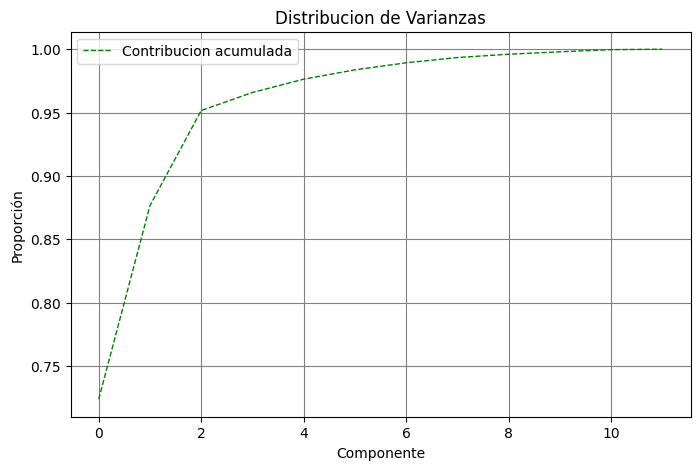

In [14]:
distribucion_vr(pca_vr)

In [15]:
pca_clases = PCA(n_components=2)

In [16]:
principalComponents=pca_clases.fit_transform(X)

In [17]:
principalComponents

array([[ 1.84832254, -0.98682939],
       [ 2.23491912, -0.0394542 ],
       [ 1.71349193, -1.06275186],
       ...,
       [-1.52844963,  1.20950574],
       [ 2.27040389,  0.00820374],
       [-1.65218721,  0.10489327]])

In [18]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

# PCA vs LDA

In [19]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [20]:
len(y_)

450000

In [21]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y_).transform(X)

In [22]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.72367909 0.15284892]


In [23]:
len(X_r)

450000

In [24]:
len(X_r[y_ == i, 0])

150066

<Figure size 640x480 with 0 Axes>

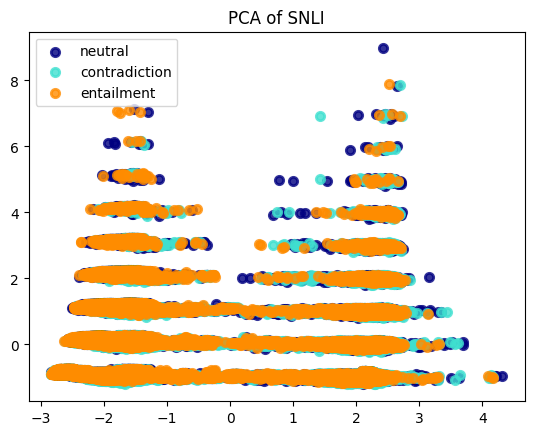

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r[y_ == i, 0], X_r[y_ == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of SNLI")

plt.figure()

In [30]:
len(X_r2)

450000

In [36]:
len(y_t)
print(len(y_t))

450000


In [39]:
# plt.figure()
# colors = ["navy", "turquoise", "darkorange"]
# lw = 2
# for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
#     plt.scatter(
#         X_r2, y_t==i,color=color, alpha=0.8, lw=lw, label=target_name
#     )
# plt.legend(loc="best", shadow=False, scatterpoints=1)
# plt.title("PCA of SICK")

# plt.figure()

Text(0.5, 1.0, 'LDA of SNLI')

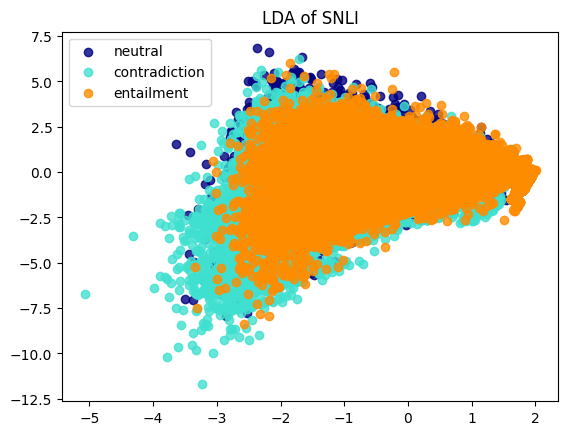

In [38]:
plt.figure()
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r2[y_ == i, 0], X_r2[y_ == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of SNLI")

# Proyection 3d

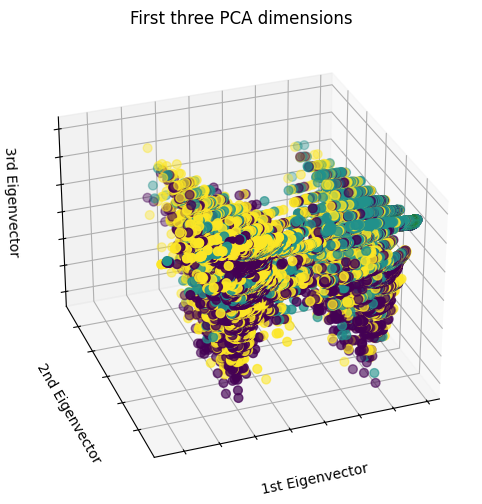

In [40]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_t,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()